In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [115]:
#데이터 전처리

df = pd.read_csv('OBS_ASOS_DD_20240108155427.csv',encoding='CP949')
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),최저 초상온도(°C)
0,95,철원,2013-12-01,0.2,-4.0,6.8,NaN,3.6,-2.3,41.0,85.0,5.1,1.0,-9.2
1,95,철원,2013-12-02,0.1,-4.1,6.2,NaN,3.2,-2.1,62.0,85.8,0.9,0.6,-7.7
2,95,철원,2013-12-03,2.5,-2.5,9.1,NaN,3.6,-0.8,33.0,81.5,5.8,1.7,-6.8
3,95,철원,2013-12-04,1.6,-2.8,8.7,NaN,3.9,-1.1,44.0,84.3,5.8,2.0,-7.8
4,95,철원,2013-12-05,2.0,-2.1,7.2,NaN,3.3,0.5,76.0,90.3,0.0,1.8,-7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,261,해남,2023-12-27,4.3,-1.3,10.8,NaN,3.7,1.1,54.0,82.6,8.4,5.4,-2.9
11041,261,해남,2023-12-28,4.1,-1.5,11.1,NaN,3.5,0.6,50.0,79.6,4.2,5.3,-3.4
11042,261,해남,2023-12-29,1.8,-3.4,8.6,NaN,4.2,-0.7,55.0,85.0,7.2,3.9,-5.0
11043,261,해남,2023-12-30,4.8,-3.5,11.4,1.2,3.2,1.9,36.0,85.1,2.7,4.7,-4.8


In [116]:
df.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)          19
최저기온(°C)           3
최고기온(°C)           3
일강수량(mm)        6940
최대 풍속(m/s)        14
평균 이슬점온도(°C)      31
최소 상대습도(%)         4
평균 상대습도(%)        24
합계 일조시간(hr)        4
평균 지면온도(°C)        4
최저 초상온도(°C)        6
dtype: int64

### 결측치 대체

In [117]:
df['평균기온(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [118]:
df['최저기온(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [119]:
df['최고기온(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [120]:
df['최대 풍속(m/s)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [121]:
df['평균 지면온도(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [122]:
df['최저 초상온도(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [123]:
df['평균 이슬점온도(°C)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [124]:
df['최소 상대습도(%)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [125]:
df['평균 상대습도(%)'].fillna(method='ffill', inplace=True)  # 앞의 값으로 대체

In [126]:
df['합계 일조시간(hr)'].fillna(method='bfill', inplace=True)  # 뒤의 값으로 대체

In [127]:
df['일강수량(mm)'].fillna(value=0, inplace=True) # 0으로 채우기

In [128]:
df.isnull().sum()

지점              0
지점명             0
일시              0
평균기온(°C)        0
최저기온(°C)        0
최고기온(°C)        0
일강수량(mm)        0
최대 풍속(m/s)      0
평균 이슬점온도(°C)    0
최소 상대습도(%)      0
평균 상대습도(%)      0
합계 일조시간(hr)     0
평균 지면온도(°C)     0
최저 초상온도(°C)     0
dtype: int64

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)




In [130]:
print(df['지점'].value_counts())

95     3683
203    3683
261    3679
Name: 지점, dtype: int64


In [131]:
# '최고기온'에 대한 7일 이동 평균을 추가

In [132]:
#스케일링
from sklearn.preprocessing import StandardScaler

# 스케일러 생성
scaler = StandardScaler()

# 스케일링할 컬럼 선택
columns_to_scale = ['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '최대 풍속(m/s)', '일강수량(mm)','평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '합계 일조시간(hr)','평균 지면온도(°C)', '최저 초상온도(°C)']

# 선택한 컬럼에 스케일링 적용
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 풍속(m/s),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),최저 초상온도(°C)
0,95,철원,2013-12-01,-1.169372,-0.971523,-1.122420,-0.259603,-0.346483,-0.745925,-0.169013,0.931274,-0.338898,-1.245966,-1.126296
1,95,철원,2013-12-02,-1.179069,-0.980565,-1.180965,-0.259603,-0.589715,-0.728771,0.930694,0.986053,-1.422317,-1.282014,-1.000877
2,95,철원,2013-12-03,-0.946334,-0.835888,-0.897996,-0.259603,-0.346483,-0.617272,-0.587950,0.691615,-0.158329,-1.182880,-0.925626
3,95,철원,2013-12-04,-1.033610,-0.863015,-0.937026,-0.259603,-0.164058,-0.643003,-0.011912,0.883342,-0.158329,-1.155844,-1.009238
4,95,철원,2013-12-05,-0.994820,-0.799719,-1.083390,-0.259603,-0.528907,-0.505773,1.663833,1.294186,-1.654478,-1.173868,-1.000877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,261,해남,2023-12-27,-0.771782,-0.727380,-0.732117,-0.259603,-0.285675,-0.454312,0.511758,0.766937,0.512359,-0.849429,-0.599536
11041,261,해남,2023-12-28,-0.791176,-0.745465,-0.702844,-0.259603,-0.407291,-0.497196,0.302290,0.561515,-0.571060,-0.858441,-0.641342
11042,261,해남,2023-12-29,-1.014215,-0.917269,-0.946783,-0.259603,0.018366,-0.608695,0.564125,0.931274,0.202811,-0.984612,-0.775123
11043,261,해남,2023-12-30,-0.723295,-0.926311,-0.673571,-0.166094,-0.589715,-0.385697,-0.430849,0.938121,-0.957995,-0.912514,-0.758400


In [133]:
### 가뭄지수 (y)
df1= pd.read_csv('CLM_SPI_DD_20240108160110.csv', encoding='cp949')
df1['SPI1'] = np.where(df1['SPI1'] <= -1, 1, 0)
df1['SPI1'].value_counts()


0    7558
1    1910
Name: SPI1, dtype: int64

C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


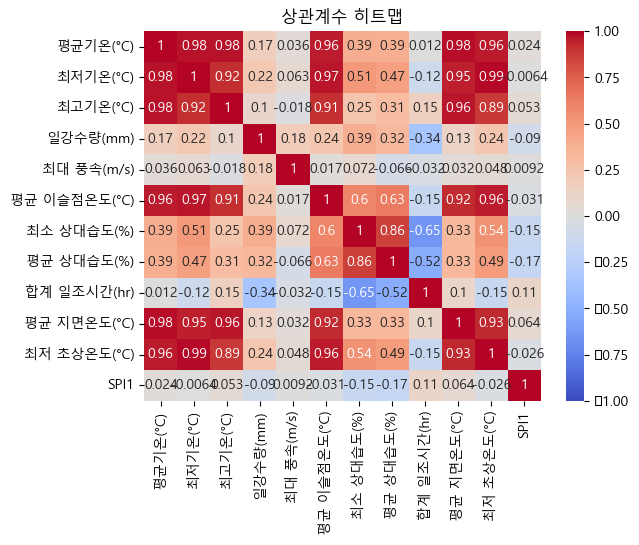

In [134]:
import pandas as pd

result = pd.merge(df, df1, on=['지점', '일시'], how='inner')
result1=result.drop(['지점명_x','지점명_y','일시','지점'],axis=1)
result1
correlation_matrix = result1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 그래프 출력
plt.title("상관계수 히트맵")
plt.show()

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, classification_report
import matplotlib.pyplot as plt
X = result1.drop('SPI1', axis=1)
Y = result1['SPI1']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size=0.2, random_state=42)

In [136]:
# 필요한 라이브러리 불러오기
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score
from spacy.pipeline import pipe
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.decomposition import PCA

# BalancedBaggingClassifier 모델 내에서 GradientBoostingClassifier 사용
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 학습 데이터에 대해 오버샘플링된 데이터를 사용하여 모델 학습
gb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = gb_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')
# 결과 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
# F1 Score 계산

Accuracy: 0.8372952984680402
Precision: 0.8202539028252955
Recall: 0.8372952984680402
F1 Score: 0.806417830897995
Confusion Matrix:
 [[1487   41]
 [ 267   98]]


In [137]:
feature_importances = gb_model.feature_importances_

# 중요도를 데이터프레임에 매핑
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도를 높은 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력
print(feature_importance_df)

         Feature  Importance
9    평균 지면온도(°C)    0.272532
7     평균 상대습도(%)    0.141743
10   최저 초상온도(°C)    0.100192
8    합계 일조시간(hr)    0.083591
0       평균기온(°C)    0.082043
5   평균 이슬점온도(°C)    0.076171
2       최고기온(°C)    0.068637
1       최저기온(°C)    0.055109
6     최소 상대습도(%)    0.052027
4     최대 풍속(m/s)    0.041567
3       일강수량(mm)    0.026389


In [138]:
y_probabilities = gb_model.predict_proba(X_test)[:, 1]

# 여러 임계값에 대한 성능 평가
thresholds = [0.2,0.25,0.3,0.4]  # 임계값을 원하는 값으로 조정
for threshold in thresholds:
    # 임계값 이상은 1로, 미만은 0으로 예측
    y_pred_adjusted = (y_probabilities > threshold).astype(int)

    # 모델 성능 평가
    accuracy = accuracy_score(y_test, y_pred_adjusted)
    precision = precision_score(y_test, y_pred_adjusted,average='weighted')
    recall = recall_score(y_test, y_pred_adjusted,average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred_adjusted)
    f1 = f1_score(y_test, y_pred_adjusted,average='weighted')
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"f1: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_mat}")


Threshold: 0.2
Accuracy: 0.7190
Precision: 0.7942
Recall: 0.7190
f1: 0.7433
Confusion Matrix:
[[1127  401]
 [ 131  234]]

Threshold: 0.25
Accuracy: 0.7739
Precision: 0.7934
Recall: 0.7739
f1: 0.7822
Confusion Matrix:
[[1273  255]
 [ 173  192]]

Threshold: 0.3
Accuracy: 0.8035
Precision: 0.7998
Recall: 0.8035
f1: 0.8016
Confusion Matrix:
[[1351  177]
 [ 195  170]]

Threshold: 0.4
Accuracy: 0.8315
Precision: 0.8106
Recall: 0.8315
f1: 0.8119
Confusion Matrix:
[[1449   79]
 [ 240  125]]


In [139]:
y_probabilities = gb_model.predict_proba(X_test)[:, 1]

# 여러 임계값에 대한 성능 평가
thresholds = 0.4
    # 임계값 이상은 1로, 미만은 0으로 예측
y_pred_adjusted = (y_probabilities > threshold).astype(int)

    # 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted,average='weighted')
recall = recall_score(y_test, y_pred_adjusted,average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted,average='weighted')
print(f"\nThreshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"f1: {f1:.4f}")
print(f"Confusion Matrix:\n{confusion_mat}")

# 추가적인 성능 평가 메트릭 출력
print('Classification Report:\n', classification_report(y_test, y_pred_adjusted))
# 현재 설정된 모든 하이퍼파라미터 값 확인
current_hyperparameters = gb_model.get_params()

# 적용된 하이퍼파라미터 출력
print("현재 설정된 하이퍼파라미터:")
for param, value in current_hyperparameters.items():
    print(f"{param}: {value}")


Threshold: 0.4
Accuracy: 0.8315
Precision: 0.8106
Recall: 0.8315
f1: 0.8119
Confusion Matrix:
[[1449   79]
 [ 240  125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1528
           1       0.61      0.34      0.44       365

    accuracy                           0.83      1893
   macro avg       0.74      0.65      0.67      1893
weighted avg       0.81      0.83      0.81      1893

현재 설정된 하이퍼파라미터:
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: log_loss
max_depth: 5
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: 42
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False


In [140]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 생성 및 학습
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42, max_depth = 12)
rf_classifier.fit(X_train_1, y_train_1)

# 테스트 데이터로 예측
y_pred_1 = rf_classifier.predict(X_test_1)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_1)
print(f'Accuracy: {accuracy:.2f}')

# 추가적인 성능 평가 메트릭 출력
print('Classification Report:\n', classification_report(y_test_1, y_pred_1))


# 현재 설정된 모든 하이퍼파라미터 값 확인
current_hyperparameters = rf_classifier.get_params()

# 적용된 하이퍼파라미터 출력
print("현재 설정된 하이퍼파라미터:")
for param, value in current_hyperparameters.items():
    print(f"{param}: {value}")

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1528
           1       0.78      0.22      0.35       365

    accuracy                           0.84      1893
   macro avg       0.81      0.60      0.63      1893
weighted avg       0.83      0.84      0.80      1893

현재 설정된 하이퍼파라미터:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 12
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 150
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


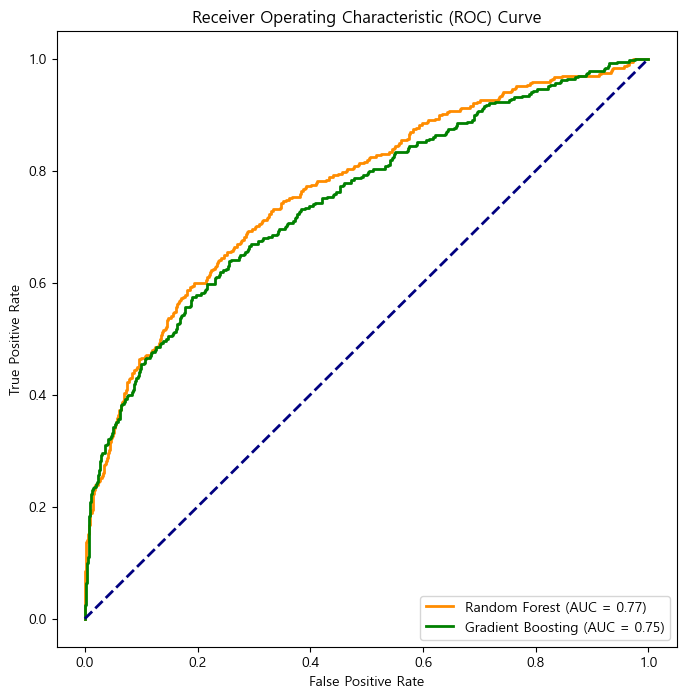

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 모델1: 다른 모델 (예: GradientBoostingClassifier)
y_probabilities_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probabilities_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# 모델2: RandomForestClassifier
y_probabilities_rf = rf_classifier.predict_proba(X_test_1)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_1, y_probabilities_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC 커브 그리기
plt.figure(figsize=(8, 8))

# 모델1 그래프
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# 모델2 그래프
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# 대각선 무작위 모델 선
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
